<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>LLM Hackathon: Decoding Discourse - AI vs Human</h1>
</div>

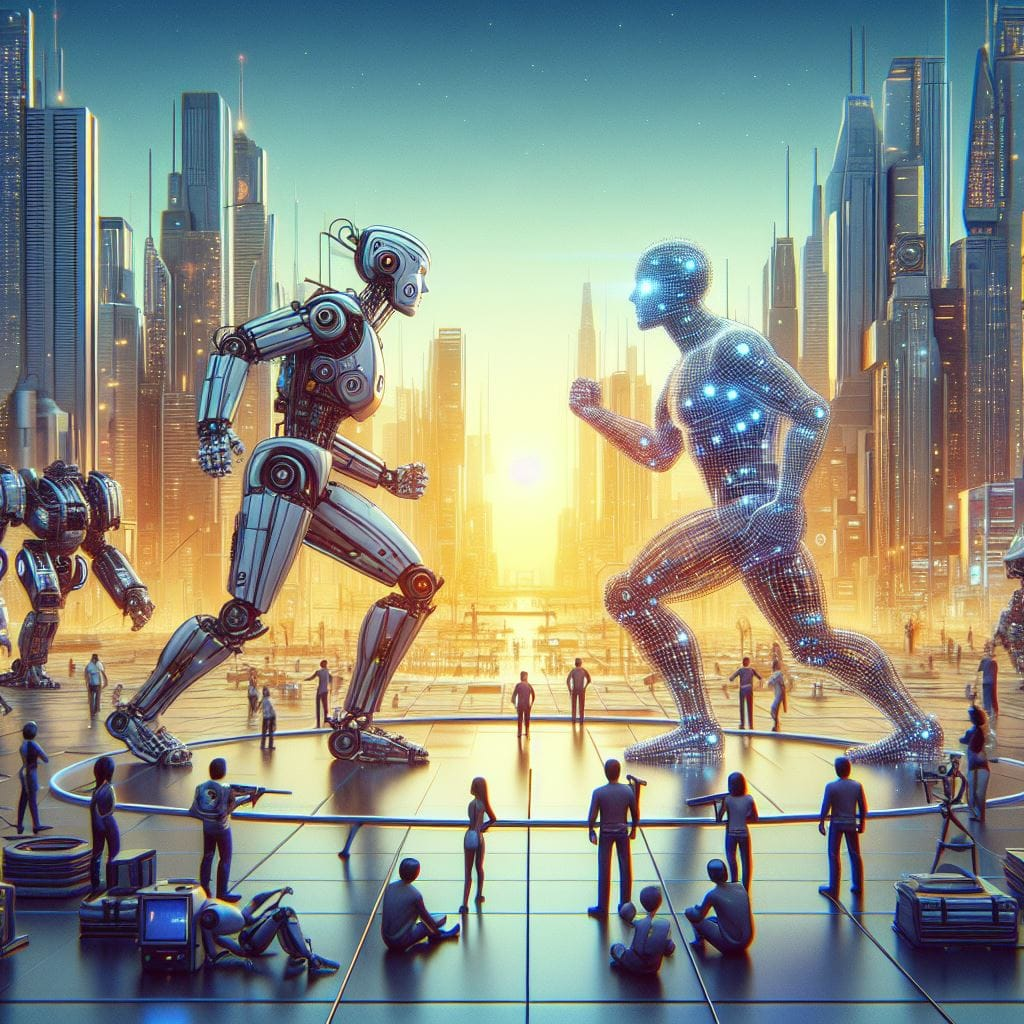
Source- DALL E3

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** MachineHack (08 Jan 2024 to 26 Jan 2024)
    
**Problem Statement:-** Build a machine learning-based approach to predict origin of essay (either crafted by students or generated by LLM)

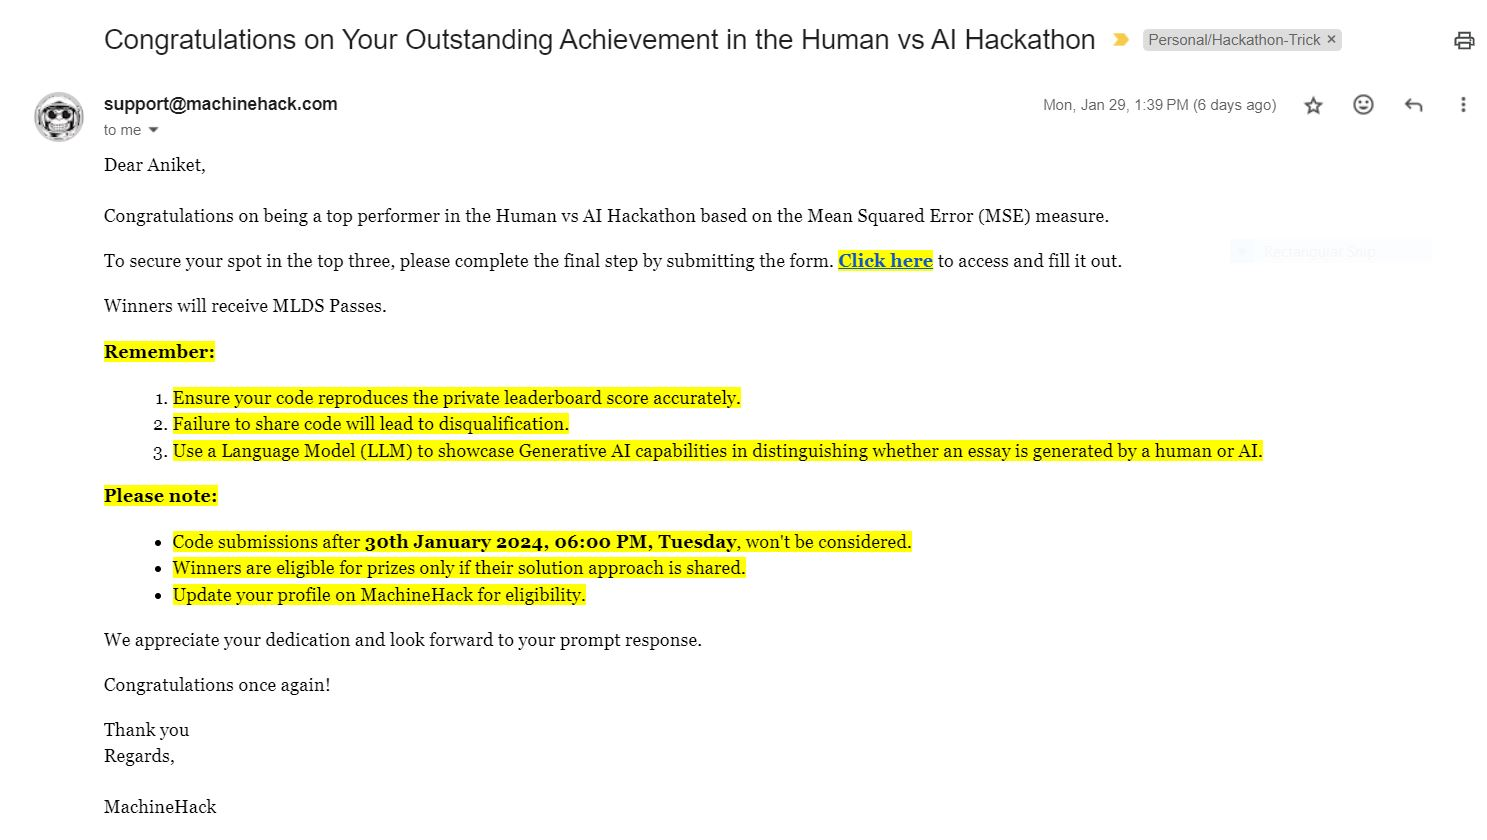

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [1]:
# Data manipulation
import scipy
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os
import platform
import psutil
import sys

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore"
                        ,category=UserWarning
                        ,module="sklearn.calibration")

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC

# Model Evaluations
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import imblearn
from imblearn.over_sampling import SMOTE


# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))
print("Python Version:", sys.version)

CatBoost version 1.1
NumPy version 1.26.2
Pandas version 1.5.1
seaborn version 0.11.2
sklearn version 1.2.2
xgboost version 1.6.2
lightgbm version 3.3.0
Python Version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train_data" Variable 
- Read & Load "Train_Prompts" data in "train_prompts" Variable
- Read & Load "Test" data in "test_data" Variable

In [2]:
# Print Current Directory
print("Current Directory:", os.getcwd())
# Load Data
data_path = 'C:/Users/PC/Pictures/MH/LLM-Hackathon-JAN2024/Dataset/'
train_data = pd.read_csv(os.path.join(data_path, 'train.csv'))
train_prompts = pd.read_csv(os.path.join(data_path, 'train_prompts.csv'))
test_data = pd.read_csv(os.path.join(data_path, 'test.csv'))

Current Directory: C:\Users\PC\Pictures\MH\LLM-Hackathon-JAN2024


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data 
- Check Top 5 entries of the data 
- Check Bottom 5 entries of the data 
- Check Null Entries in Train Dataset 
- Check Null Entries in Train Prompts Dataset  
- Check Null Entries in Test Dataset 
- Check class balance within distribution of Target_Variable

In [3]:
print("Data Types in Train Data:-\n")
print(train_data.info(),'\n')

print("Shape of Train Data:-\n")
print(train_data.shape,'\n')

print('-------------'*9)

print("\nData Types in Train Prompts Data:-\n")
print(train_prompts.info(),'\n')

print("\nShape of Train Prompts Data:-\n")
print(train_prompts.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test_data.info(),'\n')

print("\nShape of Test Data:-\n")
print(test_data.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         212 non-null    object
 1   prompt_id  212 non-null    int64 
 2   text       212 non-null    object
 3   generated  212 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ KB
None 

Shape of Train Data:-

(212, 4) 

---------------------------------------------------------------------------------------------------------------------

Data Types in Train Prompts Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory u

In [4]:
print("About Train Data:-\n")
print(train_data.head(),'\n')
print('-------------'*9)

print("\nAbout Train Prompts Data:-\n")
print(train_prompts.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test_data.head(),'\n')
print('-------------'*9)

About Train Data:-

         id  prompt_id                                               text  \
0  e663b2f5          0  The ideal career choice is one that aligns pas...   
1  dc1bd601          0  The ideal career choice is one that aligns wit...   
2  3f28d007          0  The ideal career choice is one that aligns wit...   
3  46232258          0  The ideal career choice is one that aligns wit...   
4  f9fff5c6          0  The ideal career choice is one that aligns wit...   

   generated  
0          0  
1          0  
2          0  
3          0  
4          0   

---------------------------------------------------------------------------------------------------------------------

About Train Prompts Data:-

   prompt_id                            prompt_name  \
0          0                The Ideal Career Choice   
1          1  Bottled water should be banned or not   

                                        instructions  \
0  \nWrite an explanatory essay to inform fellow ...   


In [5]:
print("About Train Data:-\n")
print(train_data.tail(),'\n')
print('-------------'*9)

print("\nAbout Train Prompts Data:-\n")
print(train_prompts.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test_data.tail(),'\n')
print('-------------'*9)

About Train Data:-

           id  prompt_id                                               text  \
207  6c4212e2          1  #The Dangers Of Bottled Water -   Internet Pub...   
208  d11bead2          1  #Bottled Water Essay -   Internet Public Libra...   
209  dff0cd2f          1  #Is Tap Water Good Or Bad For The Environment ...   
210  637f01df          1  #Environmental impact of bottled water -    Bo...   
211  5a9c7187          1  #Environmental Impacts Of The Bottled Water In...   

     generated  
207          1  
208          1  
209          1  
210          1  
211          1   

---------------------------------------------------------------------------------------------------------------------

About Train Prompts Data:-

   prompt_id                            prompt_name  \
0          0                The Ideal Career Choice   
1          1  Bottled water should be banned or not   

                                        instructions  \
0  \nWrite an explanatory essay 

In [6]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train_data.isnull().sum()
                                   ,train_data.isnull().sum()*100/len(train_data))
                               ,columns=['Missing Values','Percentage Missing Values']
                               ,index=train_data.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
id,0,0.0
prompt_id,0,0.0
text,0,0.0
generated,0,0.0


In [7]:
print("Checking Null entries & their Percentage in Train Prompts Data:-\n\n")
missing_val_train_P=pd.DataFrame(zip(train_prompts.isnull().sum()
                                   ,train_prompts.isnull().sum()*100/len(train_prompts))
                               ,columns=['Missing Values','Percentage Missing Values']
                               ,index=train_prompts.columns)
missing_val_train_P

Checking Null entries & their Percentage in Train Prompts Data:-




,Missing Values,Percentage Missing Values
prompt_id,0,0.0
prompt_name,0,0.0
instructions,0,0.0
source_text,0,0.0


In [8]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test_data.isnull().sum()
                                  ,test_data.isnull().sum()*100/len(test_data))
                              ,columns=['Missing Values','Percentage Missing Values']
                              ,index=test_data.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
id,0,0.0
prompt_id,0,0.0
text,0,0.0


Checking distribution of target variable


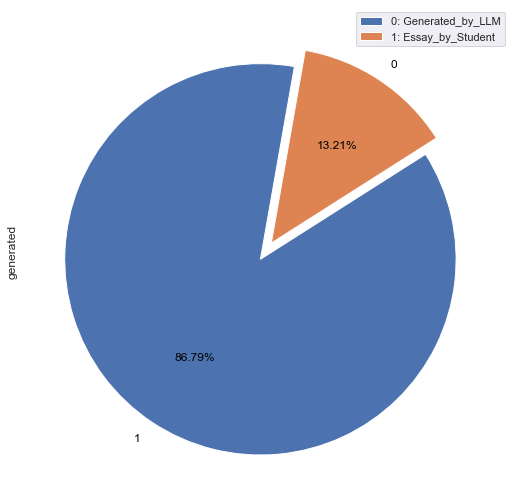

In [9]:
# Evaluate the class balance within the distribution of Target_Variable
print("Checking distribution of target variable")
train_data.generated.value_counts().plot(kind='pie'
                                         ,subplots=True
                                         ,autopct='%1.2f%%'
                                         ,explode= (0.05, 0.05)
                                         ,startangle=80
                                         ,legend=True
                                         ,fontsize=12
                                         ,figsize=(14,9)
                                         ,textprops={'color':"black"})
plt.legend(["0: Generated_by_LLM","1: Essay_by_Student"]);

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Derived Feature/s and their Definitions</h2>
</div>

### <span style="color:black">Here are the definitions for the new features available in 'final_train_data':-</span>

#### <span style="color:orange">a) **word_count**:-</span> 

The 'word_count' column denotes the total count of words within each corresponding 'text' entry.

#### <span style="color:orange">b) **avg_word_length**:-</span> 

The 'avg_word_length' column represents the mean character length of words in each corresponding 'text' entry.

#### <span style="color:orange">c) **Character_Count**:-</span> 

The 'Character_Count' column indicates the total number of characters present in each corresponding 'text' entry.

#### <span style="color:orange">d) **average_sentence_length**:-</span> 

The 'average_sentence_length' column denotes the average word count in sentences for each corresponding 'text' entry.

#### <span style="color:orange">e) **vocabulary_richness_Unique_Words_Number**:-</span> 

Compute the number of unique words in the given dataset.

#### <span style="color:orange">f) **avg_word_count_prompt**:-</span> 

Derives the average word count for each prompt within the dataset.

#### <span style="color:orange">g) **ratio_wc_avg_length_text**:-</span> 

Computes the ratio of word count to average word length for each individual entry in the dataset.

#### <span style="color:orange">h) **contains_numbers_text**:-</span> 

If there is at least one numerical digit present in the 'text' entry for a specific row, the 'contains_numbers_text' column is marked as 1 (True); otherwise, it is marked as 0 (False).

#### <span style="color:orange">i) **comma_count_text**:-</span> 

The 'comma_count_text' column records the number of commas present in each respective 'text' entry.

#### <span style="color:orange">j) **period_count_text**:-</span> 

Indicates the number of periods (full stops) present in each respective 'text' entry.

#### <span style="color:orange">k) **prompt_word_count**:-</span> 

The 'prompt_word_count' column displays the cumulative word count associated with each distinct 'prompt_id' in the dataset.

#### <span style="color:orange">l) **mean_word_count_prompt**:-</span> 

The 'mean_word_count_prompt' column showcases the average word count associated with each distinct 'prompt_id' in the dataset.

#### <span style="color:orange">m) **at_symbol_count_text**:-</span> 

The 'at_symbol_count_text' column records the frequency of "@" symbols in each respective 'text' entry.

#### <span style="color:orange">n) **hash_symbol_count_text**:-</span> 

The 'hash_symbol_count_text' column represents the number of occurrences of "#" symbols within each corresponding 'text' entry.

#### <span style="color:orange">o) **ratio_capitalized_words_text**:-</span> 

The 'ratio_capitalized_words_text' column represents the ratio of capitalized words to the total number of words in each corresponding 'text' entry.

In [10]:
# Merge final_train_datasets
final_train_data = pd.merge(train_data
                            ,train_prompts
                            ,on='prompt_id'
                            ,how='left')

# Feature 1 
final_train_data['word_count'] = final_train_data['text'].apply(lambda x: len(x.split()))

# Feature 2
final_train_data['avg_word_length'] = final_train_data['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

# Feature 3
final_train_data['Character_Count'] = final_train_data['text'].apply(lambda x: len(x))

# Feature 4
def calculate_average_sentence_length(text):
    sentences = text.split('.')  # Assuming sentences end with a period
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip() != '']
    return np.mean(sentence_lengths) if sentence_lengths else 0

final_train_data['average_sentence_length'] = final_train_data['text'].apply(calculate_average_sentence_length)

# Feature 5
final_train_data['vocabulary_richness_Unique_Words_Number'] = final_train_data['text'].apply(lambda x: len(set(x.split())))

# Feature 6
final_train_data['avg_word_count_prompt'] = final_train_data.groupby('prompt_id')['word_count'].transform('mean')

# Feature 7
final_train_data['ratio_wc_avg_length_text'] = final_train_data['word_count'] / final_train_data['avg_word_length']

# Feature 8
final_train_data['contains_numbers_text'] = final_train_data['text'].apply(lambda x: any(char.isdigit() for char in x))

# Feature 9
final_train_data['comma_count_text'] = final_train_data['text'].apply(lambda x: x.count(','))

# Feature 10
final_train_data['period_count_text'] = final_train_data['text'].apply(lambda x: x.count('.'))

# Feature 11
final_train_data['prompt_word_count'] = final_train_data.groupby('prompt_id')['word_count'].transform('sum')

# Feature 12
final_train_data['mean_word_count_prompt'] = final_train_data.groupby('prompt_id')['word_count'].transform('mean')

# Feature 13
final_train_data['at_symbol_count_text'] = final_train_data['text'].apply(lambda x: x.count('@'))

# Feature 14
final_train_data['hash_symbol_count_text'] = final_train_data['text'].apply(lambda x: x.count('#'))

# Feature 15
final_train_data['ratio_capitalized_words_text'] = final_train_data['text'].apply(lambda x: sum(word.isupper() for word in x.split()) / len(x.split()))

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing using the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique</h2>
</div>

In [11]:
# Step 1
tfidf_vectorizer = TfidfVectorizer(max_features=5000
                                   ,stop_words='english'
                                   ,ngram_range=(1, 2))

# This initializes a TF-IDF vectorizer with specific configurations:
# a) Limits the number of features (words) to 5000 based on their importance.
# b) Removes common English stop words during the vectorization process.
# c) Considers both unigrams (single words) and 
#    bigrams (two consecutive words) in the vectorization.

X_tfidf = tfidf_vectorizer.fit_transform(final_train_data['text']).toarray()

# 'X_tfidf' will contain the TF-IDF representation 
# of the 'text' column in the 'final_train_data' DataFrame

# Step 2
# Additional features for TF-IDF vectorization
X_additional = final_train_data[['word_count','avg_word_length'
                                 ,'Character_Count'
                                 ,'average_sentence_length'
                                 ,'vocabulary_richness_Unique_Words_Number'
                                 ,'avg_word_count_prompt'
                                 ,'ratio_wc_avg_length_text'
                                 ,'contains_numbers_text'
                                 ,'comma_count_text'
                                 ,'period_count_text','prompt_word_count'
                                 ,'mean_word_count_prompt'
                                 ,'at_symbol_count_text','hash_symbol_count_text'
                                 ,'ratio_capitalized_words_text']].values
X_combined = np.hstack([X_tfidf, X_additional])

# "X_combined" is a unified matrix comprising both the 
# TF-IDF-encoded representation of the text data and additional features. 
# This combined matrix serves as a comprehensive input for Ml models.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Test Data Preprocessing</h2>
</div>

In [13]:
# Load Test Data
test_data = pd.read_csv(os.path.join(data_path, 'test.csv'))

# Feature 1 
test_data['word_count'] = test_data['text'].apply(lambda x: len(x.split()))

# Feature 2
test_data['avg_word_length'] = test_data['text'].apply(lambda x: np.mean([len(word) for word in x.split()]))

# Feature 3
test_data['Character_Count'] = test_data['text'].apply(lambda x: len(x))

# Feature 4
def calculate_average_sentence_length(text):
    sentences = text.split('.')  # Assuming sentences end with a period
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence.strip() != '']
    return np.mean(sentence_lengths) if sentence_lengths else 0
 
test_data['average_sentence_length'] = test_data['text'].apply(calculate_average_sentence_length)

# Feature 5
test_data['vocabulary_richness_Unique_Words_Number'] = test_data['text'].apply(lambda x: len(set(x.split())))

# Feature 6
test_data['avg_word_count_prompt'] = test_data.groupby('prompt_id')['word_count'].transform('mean')

# Feature 7
test_data['ratio_wc_avg_length_text'] = test_data['word_count'] / test_data['avg_word_length']

# Feature 8
test_data['contains_numbers_text'] = test_data['text'].apply(lambda x: any(char.isdigit() for char in x))

# Feature 9
test_data['comma_count_text'] = test_data['text'].apply(lambda x: x.count(','))

# Feature 10
test_data['period_count_text'] = test_data['text'].apply(lambda x: x.count('.'))

# Feature 11
test_data['prompt_word_count'] = test_data.groupby('prompt_id')['word_count'].transform('sum')

# Feature 12
test_data['mean_word_count_prompt'] = test_data.groupby('prompt_id')['word_count'].transform('mean')

# Feature 13
test_data['at_symbol_count_text'] = test_data['text'].apply(lambda x: x.count('@'))

# Feature 14
test_data['hash_symbol_count_text'] = test_data['text'].apply(lambda x: x.count('#'))

# Feature 15
test_data['ratio_capitalized_words_text'] = test_data['text'].apply(lambda x: sum(word.isupper() for word in x.split()) / len(x.split()))


# Step 1
X_tfidf_test = tfidf_vectorizer.transform(test_data['text']).toarray()
# 'X_tfidf_test' will contain the TF-IDF representation 
# of the 'text' column in the 'test_data' DataFrame

# Step 2
X_additional_test = test_data[['word_count','avg_word_length'
                               ,'Character_Count'
                               ,'average_sentence_length'
                               ,'vocabulary_richness_Unique_Words_Number'
                               ,'avg_word_count_prompt'
                               ,'ratio_wc_avg_length_text'
                               ,'contains_numbers_text'
                               ,'comma_count_text'
                               ,'period_count_text'
                               ,'prompt_word_count'
                               ,'mean_word_count_prompt'
                               ,'at_symbol_count_text'
                               ,'hash_symbol_count_text'
                               ,'ratio_capitalized_words_text']].values
X_combined_test = np.hstack([X_tfidf_test, X_additional_test])
# "X_combined_test" is a unified matrix comprising both the 
# TF-IDF-encoded representation of the text data and additional features. 

# Step 3
scaler = StandardScaler()
X_combined_test_scaled = scaler.fit_transform(X_combined_test)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Model Building</h2>
</div>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Support Vector Classification (SVC) applied to Oversampled Data</h2>
</div>

In [14]:
# Step 1.1) Split Data
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_combined
                                                      ,final_train_data['generated']
                                                      ,test_size=0.01
                                                      ,random_state=42)

# Step 1.2) Use of Oversampling Technique
oversampler = SMOTE(sampling_strategy='auto'
                    ,random_state=42)

X_train_oversampled1, y_train_oversampled1 = oversampler.fit_resample(X_train1
                                                                      ,y_train1)

# Step 1.3) Feature Scaling on Oversampled Training Data
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train_oversampled1)
X_val_scaled1 = scaler.transform(X_val1)

# Step 1.4) Model1 construction: SVC with tuned hyperparameters
model1 = SVC(random_state=42,C=1.0
             ,kernel='linear'
             ,class_weight='balanced')  

# Step 1.5) Train Model1 using oversampled and scaled data
model1.fit(X_train_scaled1, y_train_oversampled1)
print('Training of Model1 is finished')

Training of Model1 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Logistic Regression applied to Oversampled Data</h2>
</div>

In [15]:
# Step 2.1) Split Data
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_combined
                                                      ,final_train_data['generated']
                                                      ,test_size=0.01
                                                      ,random_state=42)

# Step 2.2) Use of Oversampling Technique
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_train_oversampled2, y_train_oversampled2 = oversampler.fit_resample(X_train2
                                                                      ,y_train2)

# Step 2.3) Feature Scaling on Oversampled Training Data
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_oversampled2)
X_val_scaled2 = scaler.transform(X_val2)

# Step 2.4) Model2 construction: Logistic Regression with tuned hyperparameters
model2 = LogisticRegression(random_state=42
                            ,class_weight='balanced')  

# Step 2.5) Train Model2 using oversampled and scaled data
model2.fit(X_train_scaled2, y_train_oversampled2)
print('Training of Model2 is finished')

Training of Model2 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Random Forest Classifier applied to Oversampled Data</h2>
</div>

In [16]:
# Step 3.1) Split Data
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_combined
                                                      ,final_train_data['generated']
                                                      ,test_size=0.01
                                                      ,random_state=42)

# Step 3.2) Use of Oversampling Technique
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_train_oversampled3, y_train_oversampled3 = oversampler.fit_resample(X_train3
                                                                      ,y_train3)

# Step 3.3) Feature Scaling on Oversampled Training Data
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train_oversampled3)
X_val_scaled3 = scaler.transform(X_val3)

# Step 3.4) Model3 construction: Random Forest Classifier
model3 = RandomForestClassifier(random_state=0) 

# Step 3.5) Train Model3 using oversampled and scaled data
model3.fit(X_train_scaled3, y_train_oversampled3)
print('Training of Model3 is finished')

Training of Model3 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Support Vector Classification (SVC) applied to Original (Non-Oversampled) Data</h2>
</div>

In [17]:
# Step 4.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 4.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 4.3) Model4 construction: SVC with tuned hyperparameters
model4 = SVC(random_state=42,C=1.0
             ,kernel='linear'
             ,class_weight='balanced') 

# Step 4.4) Train Model4 using scaled data Only
model4.fit(X_train_scaled, y_train)
print('Training of Model4 is finished')

Training of Model4 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Integration of Support Vector Classification (SVC) into a Bagging Classifier applied to the original (Non-Oversampled) Data</h2>
</div>

In [18]:
# Step 5.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 5.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 5.3) Create a base classifier
base_classifier = SVC(random_state=42,C=1.0
                      ,kernel='linear'
                      ,class_weight='balanced')

# Step 5.4) Model5 construction: Bagging Classifier with Base Classifier
model5 = BaggingClassifier(base_classifier) 

# Step 5.5) Train Model5 using scaled data Only
model5.fit(X_train_scaled, y_train)
print('Training of Model5 is finished')

Training of Model5 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Integration of Logistic Regression into a Bagging Classifier applied to the original (Non-Oversampled) Data</h2>
</div>

In [19]:
# Step 6.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 6.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 6.3) Create a base classifier
base_classifier = LogisticRegression(random_state=42
                                     ,class_weight='balanced') 

# Step 6.4) Model6 construction: Bagging Classifier with Base Classifier
model6 = BaggingClassifier(base_classifier)

# Step 6.5) Train Model6 using scaled data Only
model6.fit(X_train_scaled, y_train)
print('Training of Model6 is finished')

Training of Model6 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Histogram Gradient Boosting Classifier applied to Original (Non-Oversampled) Data</h2>
</div>

In [20]:
# Step 7.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 7.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 7.3) Model7 construction: Histogram Gradient Boosting Classifier
model7 = HistGradientBoostingClassifier(random_state=0) 

# Step 7.4) Train Model7 using scaled data Only
model7.fit(X_train_scaled, y_train)
print('Training of Model7 is finished')

Training of Model7 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- XGBoost Random Forest Classifier(XGBRF Classifier) applied to Original (Non-Oversampled) Data</h2>
</div>

In [21]:
# Step 8.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 8.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 8.3) Model8 construction: XGBoost Random Forest Classifier
model8 = XGBRFClassifier(random_state=0) 

# Step 8.4) Train Model8 using scaled data Only
model8.fit(X_train_scaled, y_train)
print('Training of Model8 is finished')

Training of Model8 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- AdaBoost Classifier applied to Original (Non-Oversampled) Data</h2>
</div>

In [22]:
# Step 9.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 9.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 9.3) Model9 construction: AdaBoost Classifier
model9 = AdaBoostClassifier(n_estimators=220
                            , estimator = DecisionTreeClassifier(min_samples_leaf= 0.005
                                                                             , min_samples_split = 0.001
                                                                             , splitter = 'best'))
# Step 9.4) Train Model9 using scaled data Only
model9.fit(X_train_scaled, y_train)
print('Training of Model9 is finished')

Training of Model9 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Integration of  Multi-Layer Perceptron Classifier into a Bagging Classifier applied to the original (Non-Oversampled) Data</h2>
</div>

In [23]:
# Step 10.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 10.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 10.3) Create a base classifier
base_classifier = MLPClassifier(hidden_layer_sizes=(10, 10)
                        ,max_iter=1000
                        ,random_state=42)

# Step 10.4) Model10 construction: Bagging Classifier with Base Classifier
model10 = BaggingClassifier(base_classifier) 

# Step 10.4) Train Model10 using scaled data Only
model10.fit(X_train_scaled, y_train)
print('Training of Model10 is finished')

Training of Model10 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- Integration of  Stochastic Gradient Descent Classifier (Generate Probability Estimates) into a Bagging Classifier applied to the original (Non-Oversampled) Data</h2>
</div>

In [24]:
# Step 11.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 11.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 11.3) Create a base classifier
ab = make_pipeline(StandardScaler()
                   ,SGDClassifier(loss = 'hinge'))
base_classifier = CalibratedClassifierCV(ab)

# Step 11.4) Model11 construction: Bagging Classifier with Base Classifier
model11 = BaggingClassifier(base_classifier)

# Step 11.5) Train Model11 using scaled data Only
model11.fit(X_train_scaled, y_train)
print('Training of Model11 is finished')

Training of Model11 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Integration of LGBM Classifier into a Bagging Classifier applied to the original (Non-Oversampled) Data</h2>
</div>

In [25]:
# Step 12.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 12.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 12.3) Create a base classifier
base_classifier = LGBMClassifier(random_state=0)

# Step 12.4) Model12 construction: Bagging Classifier with Base Classifier
model12 = BaggingClassifier(base_classifier)

# Step 12.5) Train Model12 using scaled data Only
model12.fit(X_train_scaled, y_train)
print('Training of Model12 is finished')

Training of Model12 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- Integration of Gradient Boosting Classifier into a Bagging Classifier applied to the original (Non-Oversampled) Data</h2>
</div>

In [26]:
# Step 13.1) Split Data
X_train, X_val, y_train, y_val = train_test_split(X_combined
                                                  ,final_train_data['generated']
                                                  ,test_size=0.01
                                                  ,random_state=42)

# Step 13.2) Feature Scaling on Original Training Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 13.3) Create a base classifier
base_classifier = GradientBoostingClassifier(random_state=123
                                             ,max_depth = 10
                                             ,n_estimators = 141
                                             ,learning_rate = 0.028413535583978154
                                             ,max_features = 0.9054517208905205
                                             ,subsample = 0.8804892514755251)

# Step 13.4) Model13 construction: Bagging Classifier with Base Classifier
model13 = BaggingClassifier(base_classifier)

# Step 13.5) Train Model13 using scaled data Only
model13.fit(X_train_scaled, y_train)
print('Training of Model13 is finished')

Training of Model13 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Voting Classifier 1</h2>
</div>

In [27]:
# Step 14.1) Models used in Voting Classifier
clf11 = model2
clf22 = model3

# Step 14.2) Model14 construction: Voting Classifier 1
model14 = VotingClassifier(estimators=[('Model1', clf11)
                                       ,('Model2', clf22)]
                           ,voting='soft') 

# Step 14.3) Train Model14 using scaled data Only
model14.fit(X_train_scaled, y_train)
print('Training of Model14 is finished')

Training of Model14 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Voting Classifier 2</h2>
</div>

In [28]:
# Step 15.1) Models used in Voting Classifier
clf1 = model2
clf2 = model3
clf3 = model11

# Step 15.2) Model15 construction: Voting Classifier 2
model15 = VotingClassifier(estimators=[('Model1', clf1)
                                       ,('Model2', clf2)
                                       , ('Model5', clf3)]
                           ,voting='soft')

# Step 15.3) Train Model15 using scaled data Only
model15.fit(X_train_scaled, y_train) 
print('Training of Model15 is finished')

Training of Model15 is finished


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [29]:
# Prediction using Model 1
y_pred1 = model1.predict(X_combined_test_scaled) #ROC_AUC_Score = 1.00000

# Prediction using Model 2
y_pred2 = model2.predict(X_combined_test_scaled) #ROC_AUC_Score = 1.00000

# Prediction using Model 3
y_pred3 = model3.predict(X_combined_test_scaled) #ROC_AUC_Score = 1.00000

# Prediction using Model 4
y_pred4 = model4.predict(X_combined_test_scaled) #ROC_AUC_Score = 1.00000

# Prediction using Model 5
y_pred5 = model5.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.97826

# Prediction using Model 6
y_pred6 = model6.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.94452

# Prediction using Model 7
y_pred7 = model7.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.95652

# Prediction using Model 8
y_pred8 = model8.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.97826

# Prediction using Model 9
y_pred9 = model9.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.95652

# Prediction using Model 10
y_pred10 = model10.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.97826 

# Prediction using Model 11
y_pred11 = model11.predict(X_combined_test_scaled) #ROC_AUC_Score = 1.00000

# Prediction using Model 12
y_pred12 = model12.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.97826

# Prediction using Model 13
y_pred13 = model13.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.95652

# Prediction using Model 14
y_pred14 = model14.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.54348

# Prediction using Model 15
y_pred15 = model15.predict(X_combined_test_scaled) #ROC_AUC_Score = 0.71739

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Advanced Ensemble Technique</h2>
</div>

#### * Ensemble Technique 1

In [30]:
# Step 1
x = np.array(X_combined_test_scaled)
y_pred_A = model3.predict_proba(x)
y_pred_B = model2.predict_proba(x)

# Step 2
predictions = list()
cb_weight=0.50 
lb_weight=0.50 

# Step 3
for i, j in zip(y_pred_A, y_pred_B):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]),
          (cb_weight * i[1]) + (lb_weight * j[1])]
    predictions.append(xx)

preds_ensemble=np.argmax(predictions,axis=1)
y_pred16 = preds_ensemble #ROC_AUC_Score = 1.00000

#### * Ensemble Technique 2

In [31]:
# Step 1
x = np.array(X_combined_test_scaled)

y_pred_C = model3.predict_proba(x)
y_pred_D = model2.predict_proba(x)
y_pred_E = model14.predict_proba(x)
y_pred_F = model15.predict_proba(x)

# Step 2
predictions = list()
cb_weight=0.47
lb_weight=0.47 
mb_weight=0.03
xb_weight=0.03

# Step 3
for i, j, k, m in zip(y_pred_C, y_pred_D,y_pred_E,y_pred_F):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]) + (mb_weight * k[0]) + (xb_weight * m[0]),
          (cb_weight * i[1]) + (lb_weight * j[1]) + (mb_weight * k[1])+ (xb_weight * m[1])]
    predictions.append(xx)

preds_ensemble=np.argmax(predictions,axis=1)
y_pred17 = preds_ensemble #ROC_AUC_Score = 1.00000

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [32]:
# Ensemble Technique 2 (i.e. y_pred17) used for the final Submission

# Combine Predictions for Test Set
y_pred_combined_test = test_data.copy()
y_pred_combined_test['generated'] = y_pred17

# Save Predictions to Submission File
submission_file_path = os.path.join(data_path, 'Aniiket_Best_Model-LLM_Hackathon.csv')
y_pred_combined_test[['id', 'prompt_id', 'generated']].to_csv(submission_file_path, index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission Score:-**

**1) Private Leaderboard :-** 0.97222

**2) Public Leaderboard :-** 1.00000

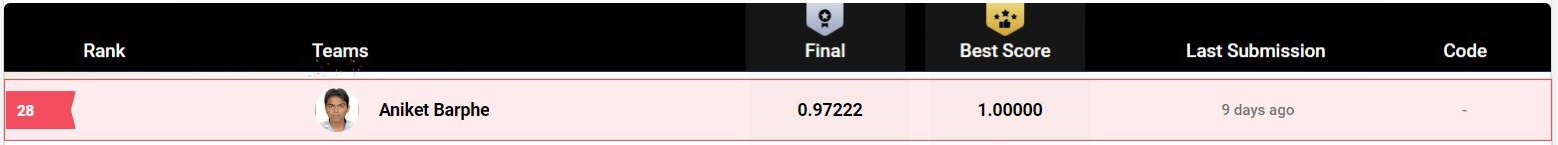

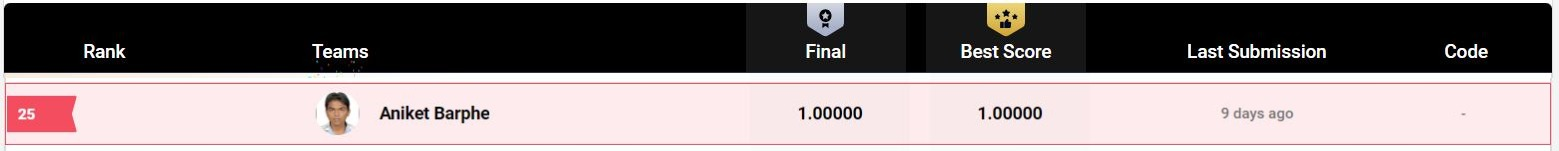

**Competition Link:-** 

https://machinehack.com/hackathons/llm_hackathon_decoding_discourse_ai_vs_human/leaderboard

**Rank Scored:-**

a) **28** out of **296** registered participants (Private Leaderboard)

b) **25** out of **296** registered participants (Public Leaderboard)